<a href="https://colab.research.google.com/github/Bhanukoya/Masters-Project/blob/master/CTE_prediction_Whole_B_datatset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df  = pd.read_excel('/content/drive/My Drive/Meng Project/Whole_B_dataset.xlsx')
df

,Mix No,Mix Types,Cement Source,Supplementary Cementitious Material (SCM),Fine Aggregate Type,Coarse Aggregate,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Compressive Strength (PSI) (7 days),Compressive Strength (PSI) (14 days),Compressive Strength (PSI) (28 days),Compressive Strength (PSI) (90 days),Modulus of Elasticity (PSI) (7 Days),Modulus of Elasticity (PSI) (14 Days),Modulus of Elasticity (PSI) (28 Days),Modulus of Elasticity (PSI) (90 Days),Poisson's Ratio (7 days),Poisson's Ratio (14 days),Poisson's Ratio (28 days),Poisson's Ratio (90 days),Split Tensile Strength (PSI) (7 days),Split Tensile Strength (PSI) (14 days),Split Tensile Strength (PSI) (28 days),Split Tensile Strength (PSI) (90 days)
0,1,A,Source 1,None,Sand A (igneous),Glacial Granite,12.0,5.7,2.25,0.40,50,4365,4878,5307,6166,3914333,4475333,4682333,4865667,0.18,0.19,0.19,0.18,411,438,442,497
1,2,A,Source 1,None,Sand A (igneous),Glacial Granite,10.0,6.0,3.00,0.40,65,3734,4350,4686,5475,3667000,3657167,3754500,4223333,0.19,0.20,0.19,0.21,426,436,433,457
2,3,A,Source 1,None,Sand A (igneous),Glacial Granite,13.0,6.2,2.50,0.40,70,3764,4012,4433,4898,3707000,3991000,3945667,4701500,0.19,0.20,0.19,0.19,317,331,384,472
3,4,A,Source 1,None,Sand A (igneous),Glacial Granite,11.0,4.7,2.00,0.40,55,4319,4657,5042,5727,4385667,4419000,4847000,4968000,0.17,0.18,0.18,0.18,420,433,450,502
4,5,A,Source 1,None,Sand A (igneous),Glacial Granite,7.0,5.7,1.25,0.40,70,5054,5852,6081,6770,4077833,4354333,4628000,4953000,0.22,0.23,0.21,0.23,466,500,525,506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,A-F,Source 1,Fly Ash,Sand B (carbonates),Glacial Granite,23.0,6.4,3.00,0.34,0,3923,4497,4792,5895,4204167,4371000,4458500,5138833,0.17,0.18,0.18,0.16,393,476,425,526
106,107,A-F,Source 1,Fly Ash,Sand B (carbonates),Glacial Granite,21.0,6.0,3.00,0.35,0,4304,5060,5885,6793,3640500,3780500,4191500,5040167,0.18,0.17,0.20,0.19,403,416,478,541
107,108,A-F,Source 1,Fly Ash,Sand B (carbonates),Crushed Stone,24.0,5.2,2.50,0.34,0,4725,5553,5944,7091,4059500,4116500,4448500,5130667,0.18,0.18,0.18,0.19,458,472,526,539
108,109,A-F,Source 1,Fly Ash,Sand B (carbonates),Crushed Stone,25.0,6.0,3.00,0.38,0,4193,4849,5067,6448,4462000,4902500,5052500,5122167,0.18,0.20,0.19,0.18,407,489,481,525


## Dataset Analysis

In [ ]:
df.shape

(110, 27)

In [ ]:
df.describe()

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Compressive Strength (PSI) (7 days),Compressive Strength (PSI) (14 days),Compressive Strength (PSI) (28 days),Compressive Strength (PSI) (90 days),Modulus of Elasticity (PSI) (7 Days),Modulus of Elasticity (PSI) (14 Days),Modulus of Elasticity (PSI) (28 Days),Modulus of Elasticity (PSI) (90 Days),Poisson's Ratio (7 days),Poisson's Ratio (14 days),Poisson's Ratio (28 days),Poisson's Ratio (90 days),Split Tensile Strength (PSI) (7 days),Split Tensile Strength (PSI) (14 days),Split Tensile Strength (PSI) (28 days),Split Tensile Strength (PSI) (90 days)
count,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02,1.100000e+02,1.100000e+02,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,55.500000,16.840909,5.180000,2.425000,0.38800,30.990909,4253.790909,4929.554545,5505.290909,6368.800000,3.786869e+06,4.031313e+06,4.338287e+06,4.892044e+06,0.185182,0.190000,0.191000,0.197000,411.581818,450.972727,486.109091,543.618182
std,31.898276,5.189055,0.626597,0.492548,0.01723,37.187967,461.425118,532.133280,596.228180,748.176006,4.933465e+05,5.056216e+05,4.979393e+05,3.887820e+05,0.017595,0.017919,0.016642,0.017896,40.160088,40.935048,41.817503,53.526120
min,1.000000,7.000000,3.700000,1.250000,0.33000,0.000000,3369.000000,3690.000000,4226.000000,4898.000000,2.838333e+06,3.051500e+06,3.329667e+06,3.831833e+06,0.140000,0.150000,0.130000,0.150000,315.000000,331.000000,366.000000,427.000000
25%,28.250000,12.500000,4.700000,2.000000,0.38000,0.000000,3891.000000,4534.250000,5067.750000,5893.500000,3.368208e+06,3.650417e+06,3.986250e+06,4.632958e+06,0.170000,0.180000,0.180000,0.180000,388.500000,428.000000,467.250000,513.000000
50%,55.500000,16.000000,5.150000,2.500000,0.40000,10.000000,4210.000000,4859.500000,5387.000000,6262.500000,3.726000e+06,3.937000e+06,4.279084e+06,4.867334e+06,0.180000,0.190000,0.190000,0.200000,413.000000,448.500000,485.500000,536.500000
75%,82.750000,21.000000,5.600000,3.000000,0.40000,63.750000,4582.000000,5314.750000,5910.500000,6782.000000,4.221042e+06,4.372125e+06,4.649125e+06,5.148958e+06,0.197500,0.200000,0.200000,0.210000,438.750000,476.750000,508.500000,576.750000
max,110.000000,31.000000,6.500000,3.000000,0.40000,125.000000,5497.000000,6425.000000,7293.000000,8798.000000,4.962000e+06,5.408000e+06,5.680000e+06,6.044000e+06,0.230000,0.240000,0.220000,0.240000,507.000000,591.000000,628.000000,735.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Mix No                                     110 non-null    int64  
 1   Mix Types                                  110 non-null    object 
 2   Cement Source                              110 non-null    object 
 3   Supplementary Cementitious Material (SCM)  110 non-null    object 
 4   Fine Aggregate Type                        110 non-null    object 
 5   Coarse Aggregate                           110 non-null    object 
 6   Air Entraining Admixture (AEA) (mL)        110 non-null    float64
 7   Air Content (%)                            110 non-null    float64
 8   Slump (in)                                 110 non-null    float64
 9   Water-to-Cement Ratio (WCM)                110 non-null    float64
 10  Water Reducing Admixture (

In [ ]:
df.isna().sum()

Mix No                                       0
Mix Types                                    0
Cement Source                                0
Supplementary Cementitious Material (SCM)    0
Fine Aggregate Type                          0
Coarse Aggregate                             0
Air Entraining Admixture (AEA) (mL)          0
Air Content (%)                              0
Slump (in)                                   0
Water-to-Cement Ratio (WCM)                  0
Water Reducing Admixture (WRA) (mL)          0
Compressive Strength (PSI) (7 days)          0
Compressive Strength (PSI) (14 days)         0
Compressive Strength (PSI) (28 days)         0
Compressive Strength (PSI) (90 days)         0
Modulus of Elasticity (PSI) (7 Days)         0
Modulus of Elasticity (PSI) (14 Days)        0
Modulus of Elasticity (PSI) (28 Days)        0
Modulus of Elasticity (PSI) (90 Days)        0
Poisson's Ratio (7 days)                     0
Poisson's Ratio (14 days)                    0
Poisson's Rat

In [ ]:
df.dtypes

Mix No                                         int64
Mix Types                                     object
Cement Source                                 object
Supplementary Cementitious Material (SCM)     object
Fine Aggregate Type                           object
Coarse Aggregate                              object
Air Entraining Admixture (AEA) (mL)          float64
Air Content (%)                              float64
Slump (in)                                   float64
Water-to-Cement Ratio (WCM)                  float64
Water Reducing Admixture (WRA) (mL)            int64
Compressive Strength (PSI) (7 days)            int64
Compressive Strength (PSI) (14 days)           int64
Compressive Strength (PSI) (28 days)           int64
Compressive Strength (PSI) (90 days)           int64
Modulus of Elasticity (PSI) (7 Days)           int64
Modulus of Elasticity (PSI) (14 Days)          int64
Modulus of Elasticity (PSI) (28 Days)          int64
Modulus of Elasticity (PSI) (90 Days)         

### Analysis of Feature variables

In [ ]:
import scipy
from scipy import stats

sns.set(style='whitegrid')

In [ ]:
# Function to find number of ouliers and to draw feature plots

def Feature_analysis(x):


  Q1 = df[x].quantile(q=0.25)
  Q3 = df[x].quantile(q=0.75)
  IQR = stats.iqr(df[x])

  print('1st Quartile of ' + x + ' :' , Q1)
  print('3rd Quartile of ' + x + ' :', Q3)
  print('Inter Quartile range of ' + x + ' :', IQR, '\n')



  Lower_outlier = Q1 - 1.5*(IQR)
  upper_outlier = Q3 + 1.5*(IQR)

  print('Lower outlier value in ' + x + ' :', Lower_outlier)
  print('upper outlier value in ' + x + ' :', upper_outlier, '\n')



  print('Number of lower outliers in ' + x + ' :' ,df[df[x]<Lower_outlier][x].count())
  print('Number of upper outliers in ' + x + ' :' ,df[df[x]>upper_outlier][x].count())

  print('% of lower outliers in ' + x + ' :', round(df[df[x]<Lower_outlier][x].count()*100/len(df)))
  print('% of upper outliers in ' + x + ' :', round(df[df[x]>upper_outlier][x].count()*100/len(df)),'\n' )




  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))

  # Distribution plot
  sns.distplot(df[x], ax=ax1)
  ax1.set_xlabel(x, fontsize=15)
  ax1.set_title('Distribution plot', fontsize=20)
  ax1.tick_params(labelsize=15)

  # Box plot
  sns.boxplot(df[x], ax=ax2, orient='v' )
  ax2.set_ylabel(x, fontsize=15)
  ax2.set_title( x +' ' + 'Distribution', fontsize=20)
  ax2.tick_params(labelsize=15)


  # Histogram
  ax3.hist(df[x])
  ax3.set_xlabel(x, fontsize = 15)
  ax3.set_title('Histogram', fontsize = 20)
  ax3.tick_params(labelsize=15)


  plt.tight_layout()

1st Quartile of Air Entraining Admixture (AEA) (mL) : 12.5
3rd Quartile of Air Entraining Admixture (AEA) (mL) : 21.0
Inter Quartile range of Air Entraining Admixture (AEA) (mL) : 8.5 

Lower outlier value in Air Entraining Admixture (AEA) (mL) : -0.25
upper outlier value in Air Entraining Admixture (AEA) (mL) : 33.75 

Number of lower outliers in Air Entraining Admixture (AEA) (mL) : 0
Number of upper outliers in Air Entraining Admixture (AEA) (mL) : 0
% of lower outliers in Air Entraining Admixture (AEA) (mL) : 0.0
% of upper outliers in Air Entraining Admixture (AEA) (mL) : 0.0 



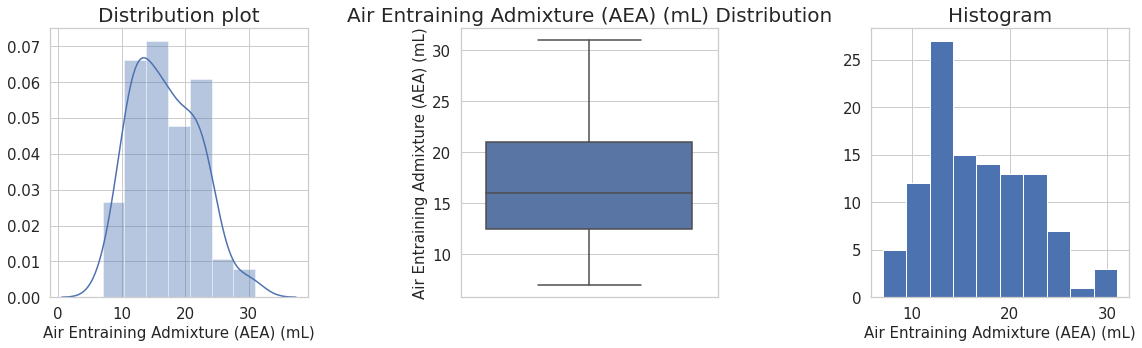

In [ ]:
Feature_analysis('Air Entraining Admixture (AEA) (mL)')

1st Quartile of Air Content (%) : 4.7
3rd Quartile of Air Content (%) : 5.6
Inter Quartile range of Air Content (%) : 0.8999999999999995 

Lower outlier value in Air Content (%) : 3.350000000000001
upper outlier value in Air Content (%) : 6.949999999999999 

Number of lower outliers in Air Content (%) : 0
Number of upper outliers in Air Content (%) : 0
% of lower outliers in Air Content (%) : 0.0
% of upper outliers in Air Content (%) : 0.0 



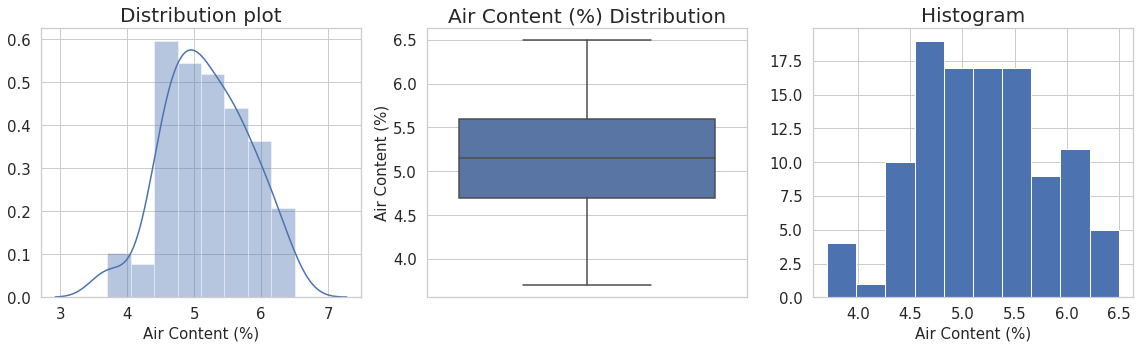

In [ ]:
Feature_analysis('Air Content (%)')

1st Quartile of Slump (in) : 2.0
3rd Quartile of Slump (in) : 3.0
Inter Quartile range of Slump (in) : 1.0 

Lower outlier value in Slump (in) : 0.5
upper outlier value in Slump (in) : 4.5 

Number of lower outliers in Slump (in) : 0
Number of upper outliers in Slump (in) : 0
% of lower outliers in Slump (in) : 0.0
% of upper outliers in Slump (in) : 0.0 



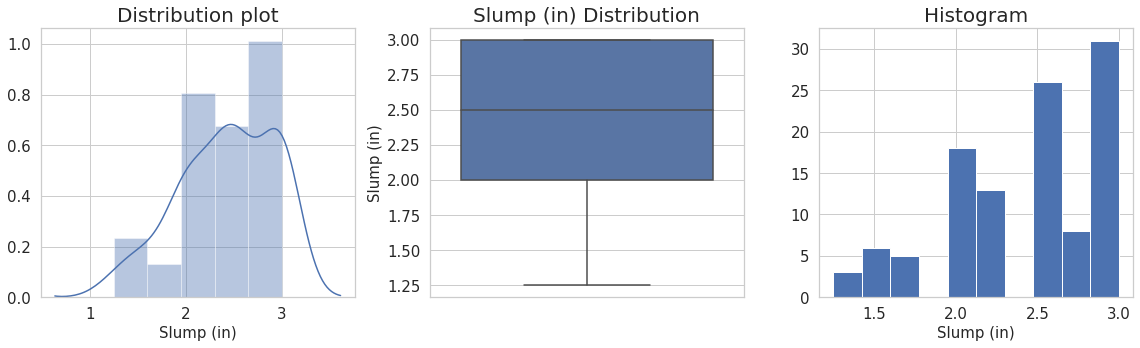

In [ ]:
Feature_analysis('Slump (in)')

1st Quartile of Water-to-Cement Ratio (WCM) : 0.38
3rd Quartile of Water-to-Cement Ratio (WCM) : 0.4
Inter Quartile range of Water-to-Cement Ratio (WCM) : 0.020000000000000018 

Lower outlier value in Water-to-Cement Ratio (WCM) : 0.35
upper outlier value in Water-to-Cement Ratio (WCM) : 0.43000000000000005 

Number of lower outliers in Water-to-Cement Ratio (WCM) : 5
Number of upper outliers in Water-to-Cement Ratio (WCM) : 0
% of lower outliers in Water-to-Cement Ratio (WCM) : 5.0
% of upper outliers in Water-to-Cement Ratio (WCM) : 0.0 



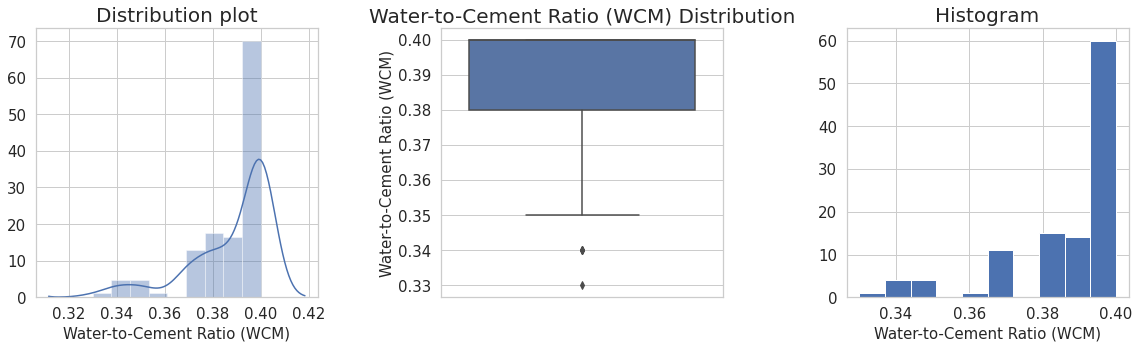

In [ ]:
Feature_analysis('Water-to-Cement Ratio (WCM)')

1st Quartile of Water Reducing Admixture (WRA) (mL) : 0.0
3rd Quartile of Water Reducing Admixture (WRA) (mL) : 63.75
Inter Quartile range of Water Reducing Admixture (WRA) (mL) : 63.75 

Lower outlier value in Water Reducing Admixture (WRA) (mL) : -95.625
upper outlier value in Water Reducing Admixture (WRA) (mL) : 159.375 

Number of lower outliers in Water Reducing Admixture (WRA) (mL) : 0
Number of upper outliers in Water Reducing Admixture (WRA) (mL) : 0
% of lower outliers in Water Reducing Admixture (WRA) (mL) : 0.0
% of upper outliers in Water Reducing Admixture (WRA) (mL) : 0.0 



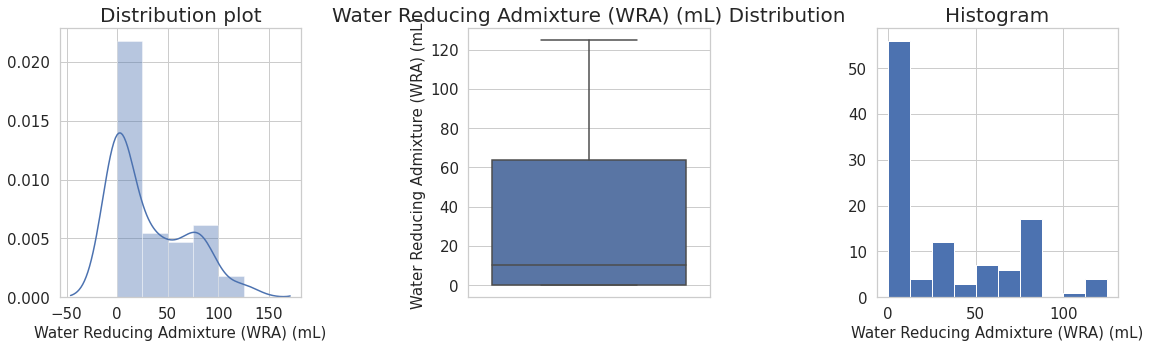

In [ ]:
Feature_analysis('Water Reducing Admixture (WRA) (mL)')

In [ ]:
import plotly
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.figure_factory import create_distplot

In [ ]:
def plots(x):
  # Box plot
  trace1 = go.Box(y = df[x],name = x, marker = dict(color='rgb(255,0,0)',))
  data = [trace1]
  layout = go.Layout(title = 'Box Plot')
  fig = go.Figure(data = data, layout = layout)
  iplot(fig)
  #fig.write_image("fig1.png")

  # Histogram
  trace1 = go.Histogram(x = df[x], marker = dict(color = 'rgb(0,255,200)') )
  data = [trace1]
  layout = go.Layout(title = 'Histogram',yaxis = dict(title='Count'), xaxis = dict(title = x))
  fig = go.Figure(data = data, layout = layout)
  iplot(fig)

  #Dist plot
  fig = create_distplot(hist_data = [df[x]], group_labels= [x],  show_rug=False, colors=['rgb(200, 110, 30)'])
  fig.update_layout(title_text='Distplot')
  fig.show()


In [ ]:
plots('Air Entraining Admixture (AEA) (mL)')

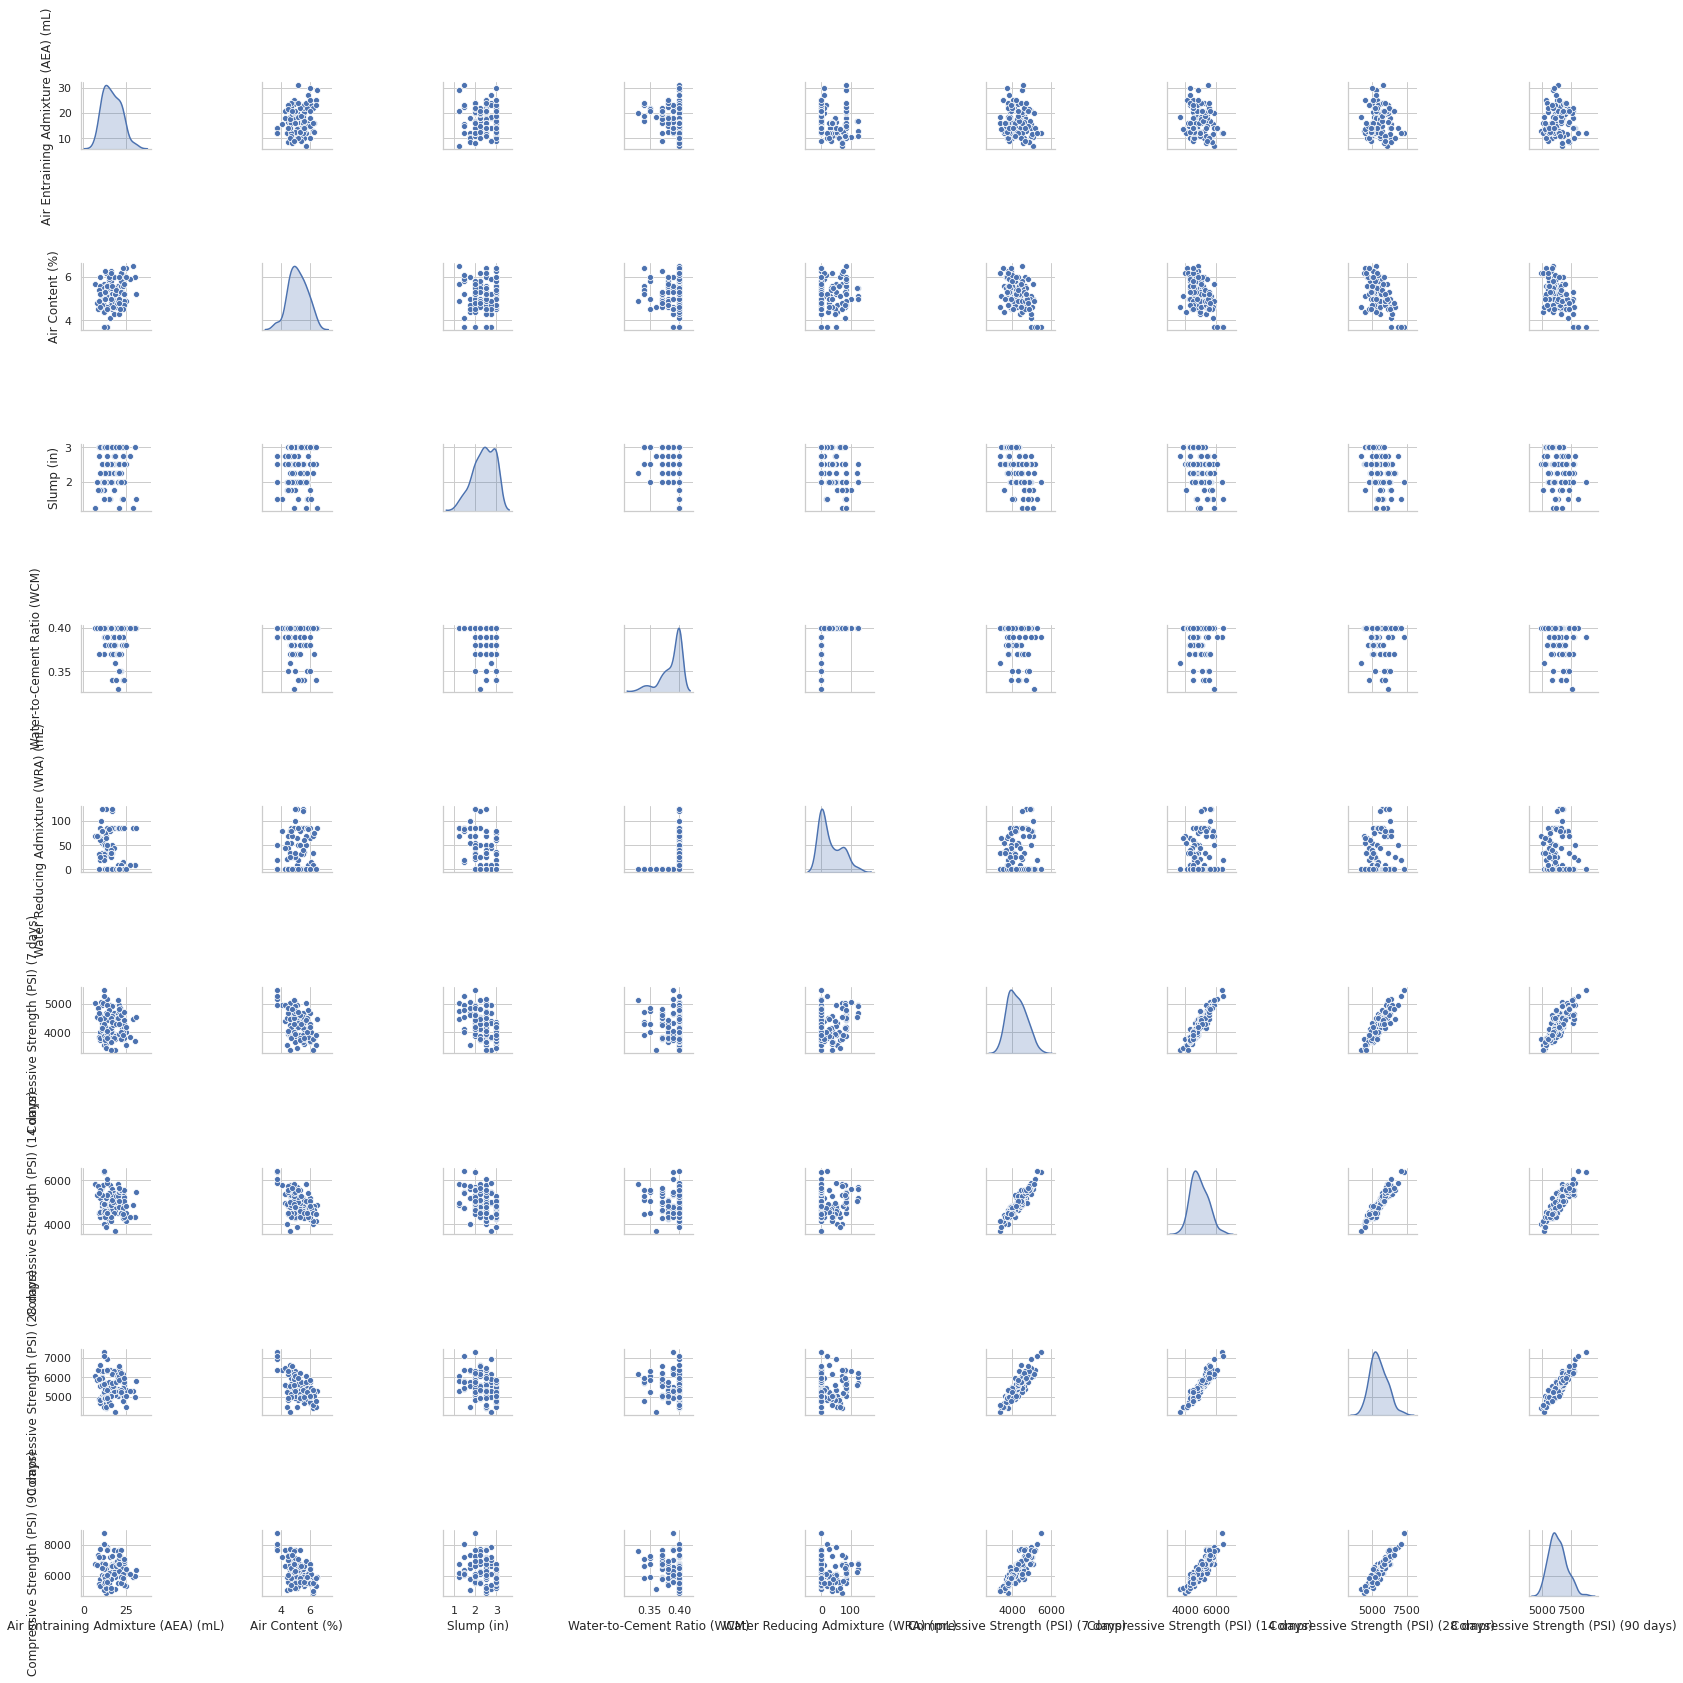

In [ ]:
sns.pairplot(df[df.columns[1:15]], diag_kind= 'kde')

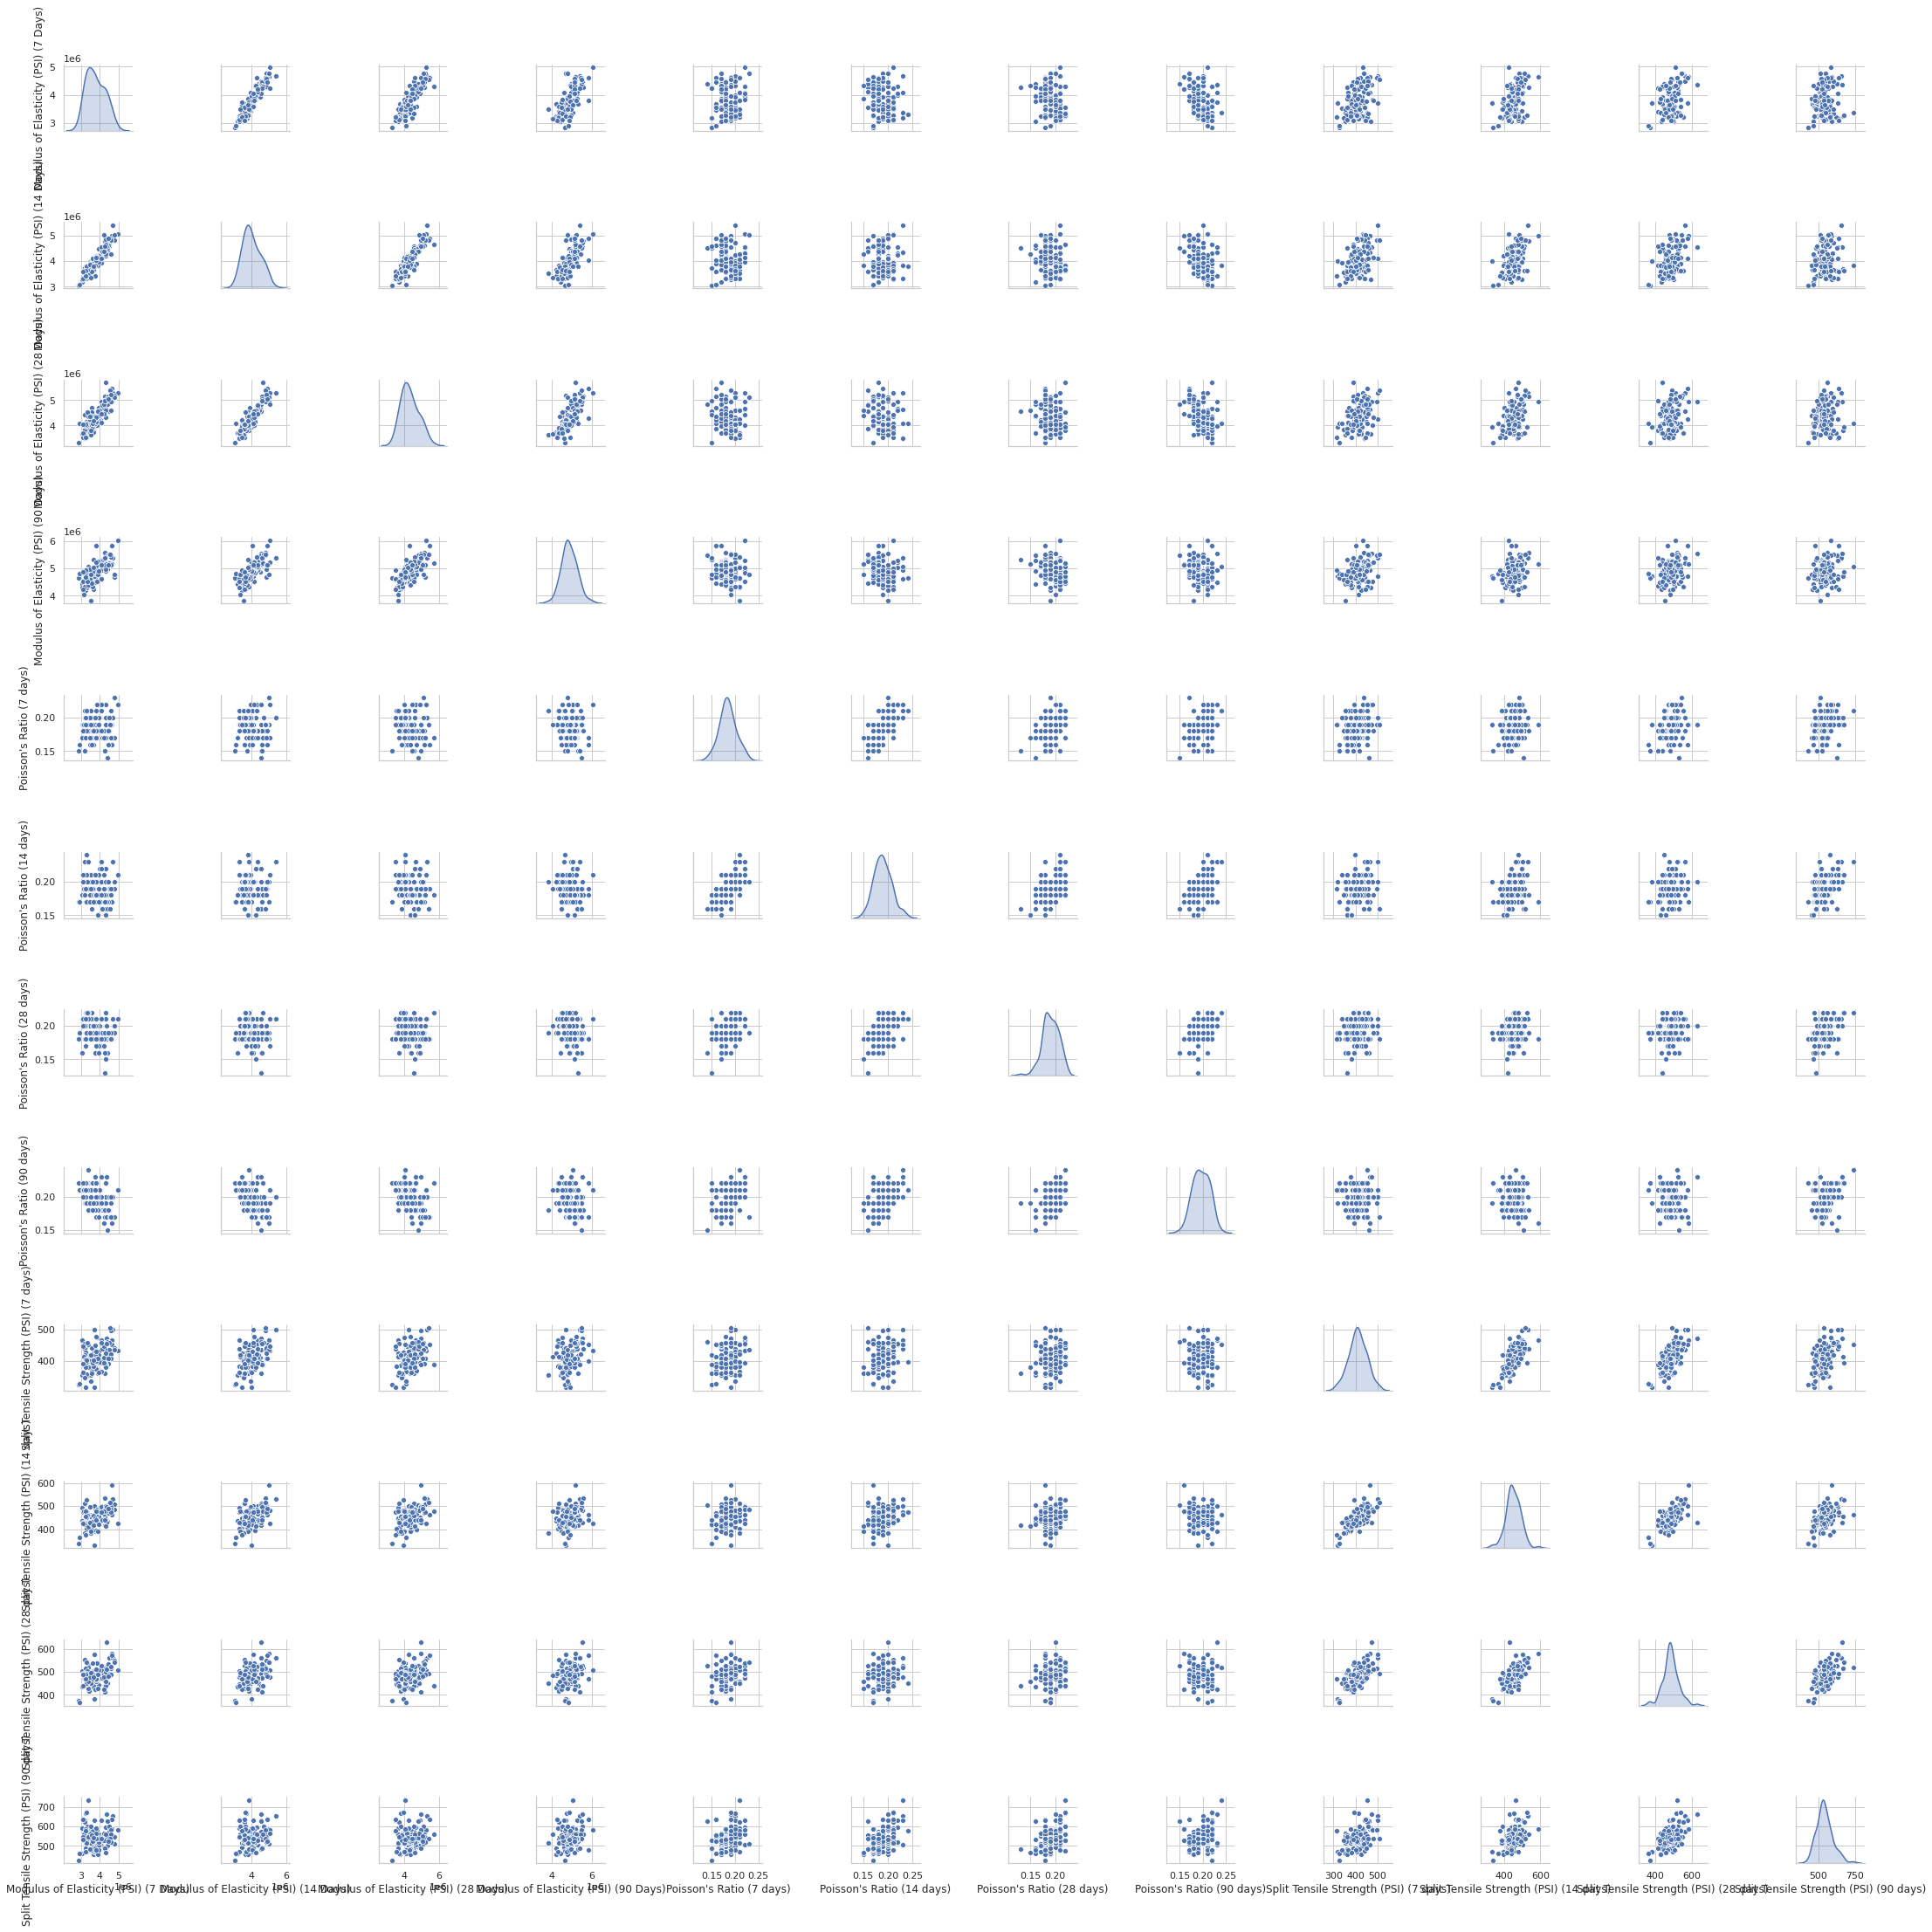

In [ ]:
sns.pairplot(df[df.columns[15:]], diag_kind= 'kde')

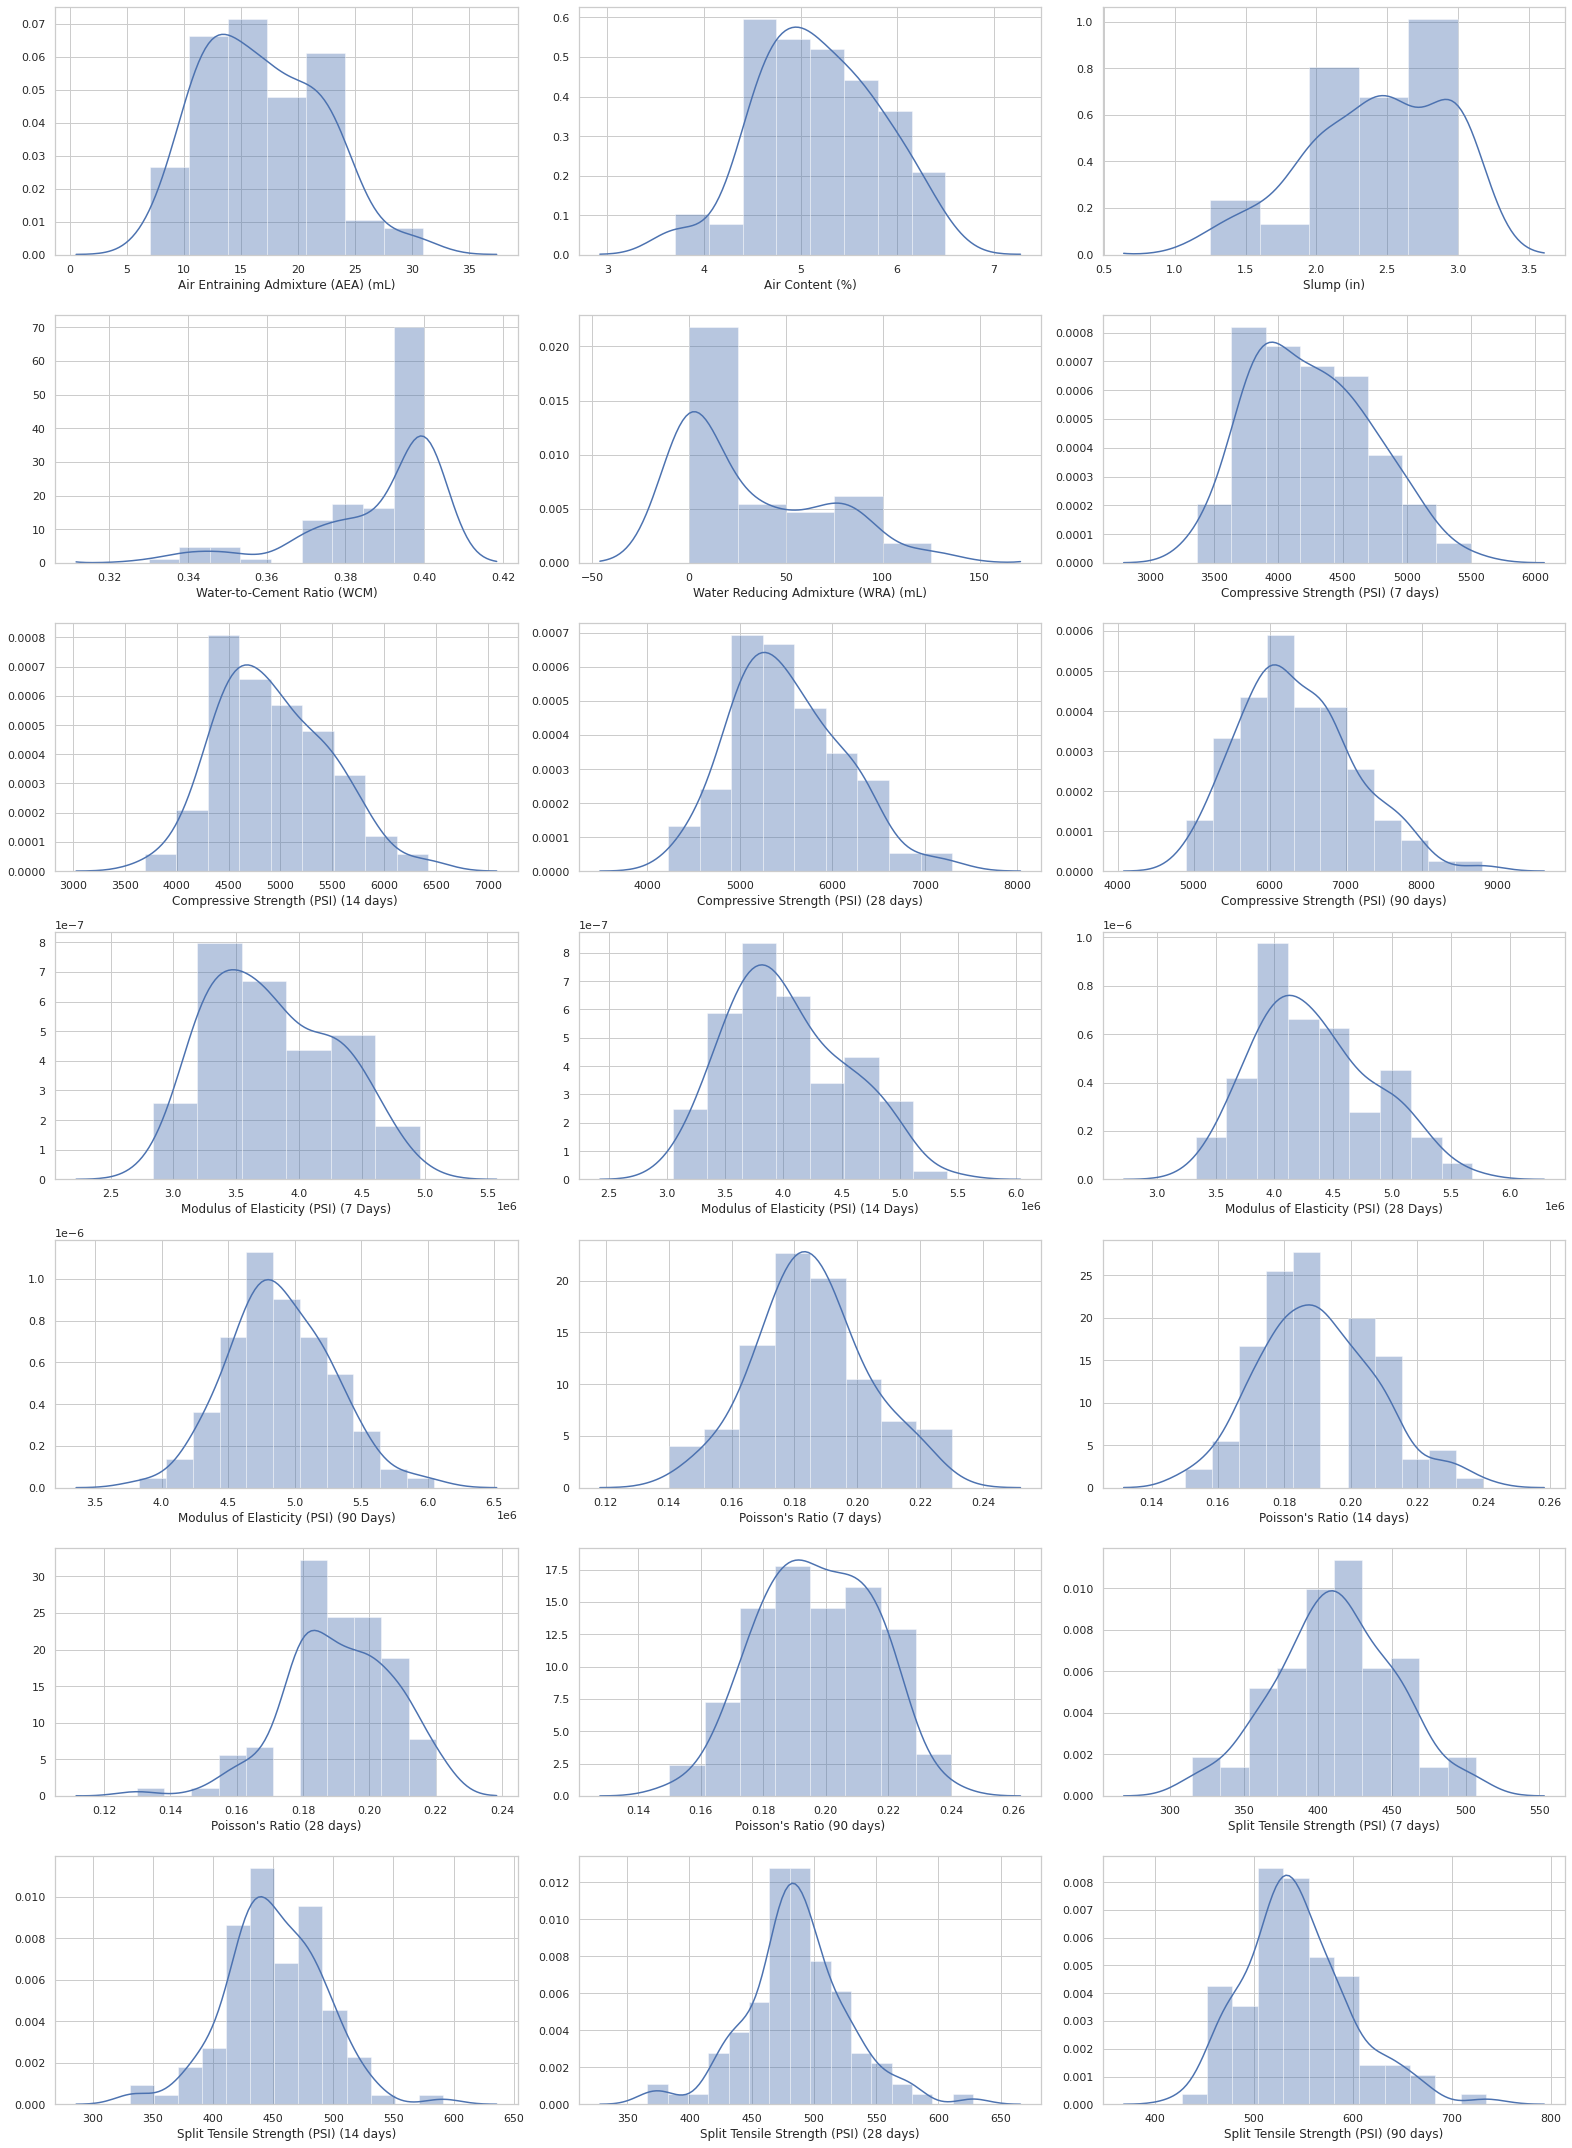

In [ ]:
rows = 7
cols = 3
fig, ax  = plt.subplots(nrows=rows, ncols=cols, figsize = (22, 30))

columns = df.columns[6:]
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot( df[columns[index]] ,ax = ax[i][j])
    index += 1

plt.tight_layout()

Features Air Entraining Admixture and Air content are near normal distributed

In [ ]:
correlation= df.corr()

Text(0.5, 1.0, 'Correlation among Features')

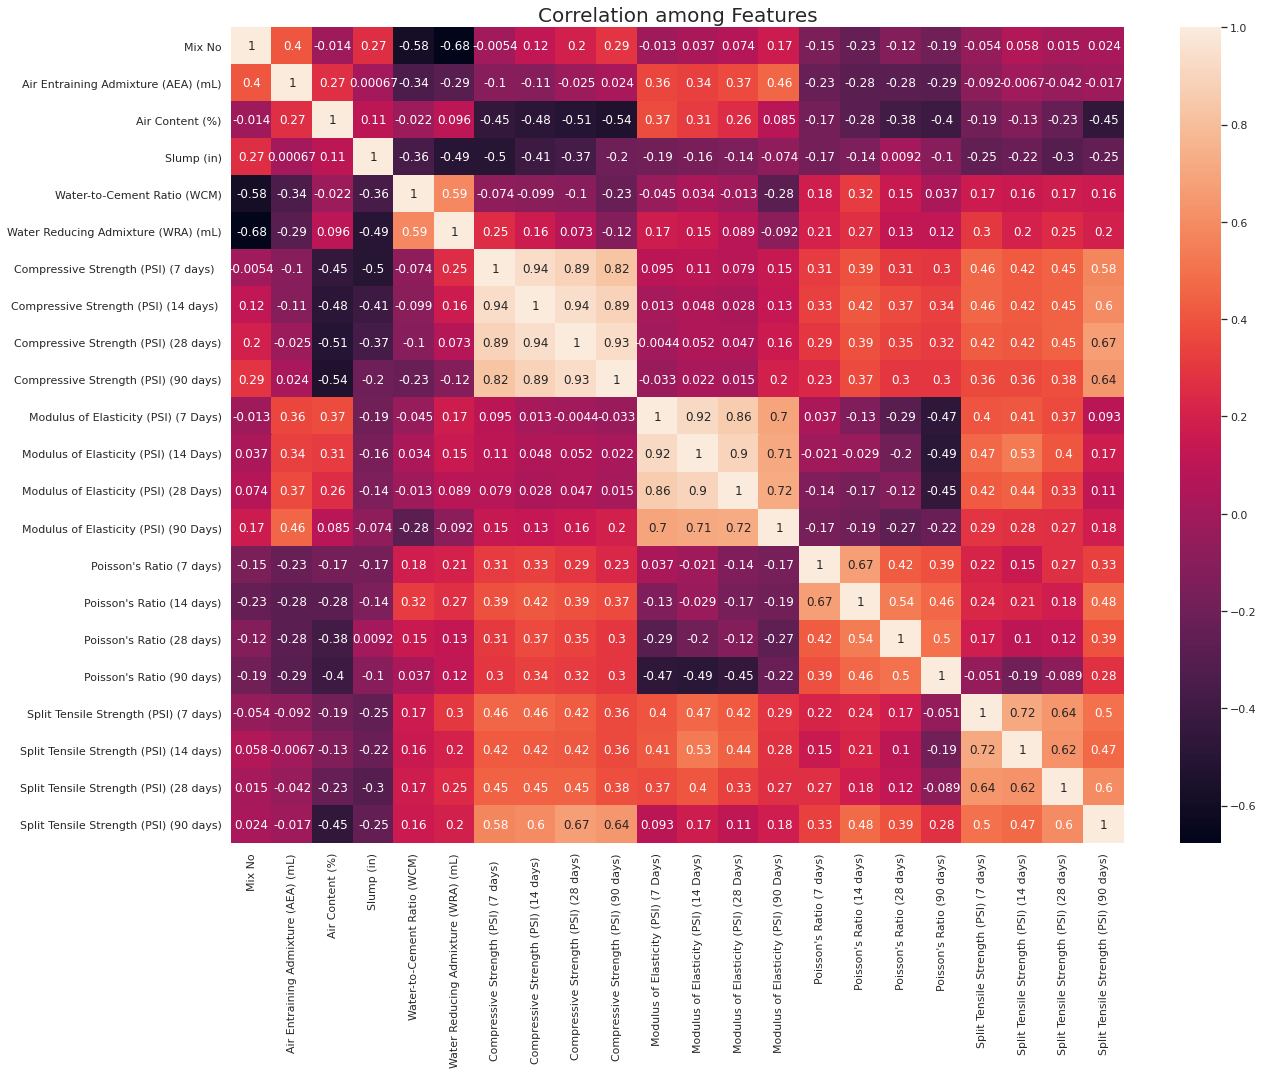

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation, annot=True)

plt.title("Correlation among Features", fontsize = 20)

In [ ]:
df.columns

Index(['Mix No', 'Mix Types', 'Cement Source',
       'Supplementary Cementitious Material (SCM)', 'Fine Aggregate Type',
       'Coarse Aggregate', 'Air Entraining Admixture (AEA) (mL)',
       'Air Content (%)', 'Slump (in)', 'Water-to-Cement Ratio (WCM)',
       'Water Reducing Admixture (WRA) (mL)',
       'Compressive Strength (PSI) (7 days)  ',
       'Compressive Strength (PSI) (14 days) ',
       'Compressive Strength (PSI) (28 days)',
       'Compressive Strength (PSI) (90 days)',
       'Modulus of Elasticity (PSI) (7 Days)',
       'Modulus of Elasticity (PSI) (14 Days)',
       'Modulus of Elasticity (PSI) (28 Days)',
       'Modulus of Elasticity (PSI) (90 Days)', 'Poisson's Ratio (7 days)',
       'Poisson's Ratio (14 days)', 'Poisson's Ratio (28 days)',
       'Poisson's Ratio (90 days)', 'Split Tensile Strength (PSI) (7 days)',
       'Split Tensile Strength (PSI) (14 days)',
       'Split Tensile Strength (PSI) (28 days)',
       'Split Tensile Strength (PSI) (90 days)

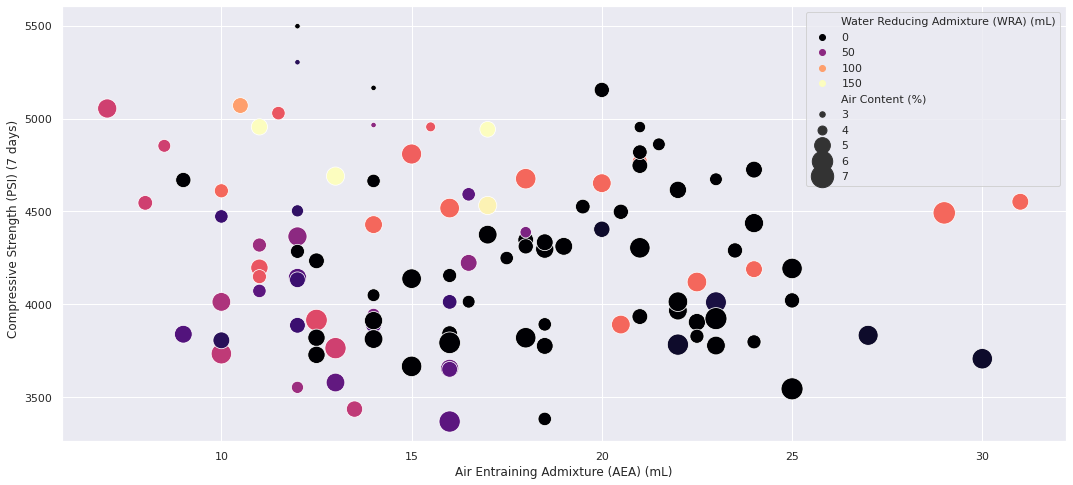

In [ ]:
plt.figure(figsize=(18,8))

sns.set_style(style='darkgrid')
sns.scatterplot(x = df['Air Entraining Admixture (AEA) (mL)'], y = df['Compressive Strength (PSI) (7 days)  '], hue=df['Water Reducing Admixture (WRA) (mL)'], size= df['Air Content (%)'], sizes=(30, 500), palette='magma')

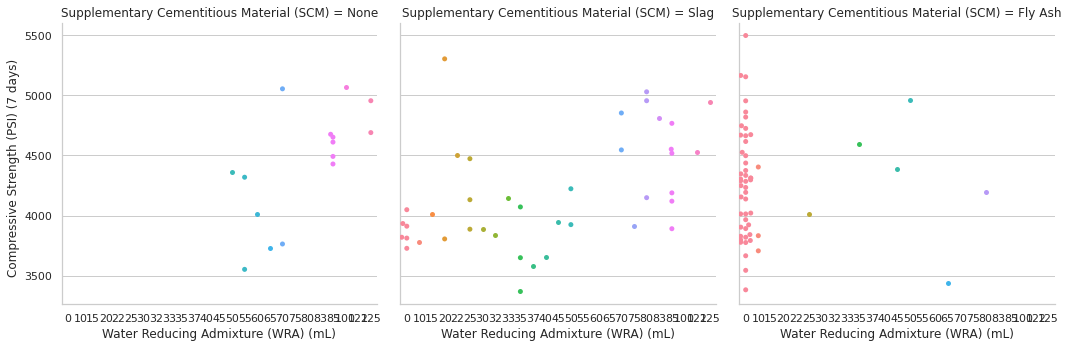

In [ ]:
sns.set_style('whitegrid')
sns.catplot(x = 'Water Reducing Admixture (WRA) (mL)', y = 'Compressive Strength (PSI) (7 days)  ', col='Supplementary Cementitious Material (SCM)', data=df, kind='swarm')
plt.tight_layout()

In [ ]:
df.head(2)

,Mix No,Mix Types,Cement Source,Supplementary Cementitious Material (SCM),Fine Aggregate Type,Coarse Aggregate,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Compressive Strength (PSI) (7 days),Compressive Strength (PSI) (14 days),Compressive Strength (PSI) (28 days),Compressive Strength (PSI) (90 days),Modulus of Elasticity (PSI) (7 Days),Modulus of Elasticity (PSI) (14 Days),Modulus of Elasticity (PSI) (28 Days),Modulus of Elasticity (PSI) (90 Days),Poisson's Ratio (7 days),Poisson's Ratio (14 days),Poisson's Ratio (28 days),Poisson's Ratio (90 days),Split Tensile Strength (PSI) (7 days),Split Tensile Strength (PSI) (14 days),Split Tensile Strength (PSI) (28 days),Split Tensile Strength (PSI) (90 days)
0,1,A,Source 1,None,Sand A (igneous),Glacial Granite,12.0,5.7,2.25,0.4,50,4365,4878,5307,6166,3914333,4475333,4682333,4865667,0.18,0.19,0.19,0.18,411,438,442,497
1,2,A,Source 1,None,Sand A (igneous),Glacial Granite,10.0,6.0,3.00,0.4,65,3734,4350,4686,5475,3667000,3657167,3754500,4223333,0.19,0.20,0.19,0.21,426,436,433,457


In [ ]:
df = pd.get_dummies(df) 

In [ ]:
df.head()

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Compressive Strength (PSI) (7 days),Compressive Strength (PSI) (14 days),Compressive Strength (PSI) (28 days),Compressive Strength (PSI) (90 days),Modulus of Elasticity (PSI) (7 Days),Modulus of Elasticity (PSI) (14 Days),Modulus of Elasticity (PSI) (28 Days),Modulus of Elasticity (PSI) (90 Days),Poisson's Ratio (7 days),Poisson's Ratio (14 days),Poisson's Ratio (28 days),Poisson's Ratio (90 days),Split Tensile Strength (PSI) (7 days),Split Tensile Strength (PSI) (14 days),Split Tensile Strength (PSI) (28 days),Split Tensile Strength (PSI) (90 days),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,1,12.0,5.7,2.25,0.4,50,4365,4878,5307,6166,3914333,4475333,4682333,4865667,0.18,0.19,0.19,0.18,411,438,442,497,1,0,0,1,0,0,1,0,1,0,0,1
1,2,10.0,6.0,3.00,0.4,65,3734,4350,4686,5475,3667000,3657167,3754500,4223333,0.19,0.20,0.19,0.21,426,436,433,457,1,0,0,1,0,0,1,0,1,0,0,1
2,3,13.0,6.2,2.50,0.4,70,3764,4012,4433,4898,3707000,3991000,3945667,4701500,0.19,0.20,0.19,0.19,317,331,384,472,1,0,0,1,0,0,1,0,1,0,0,1
3,4,11.0,4.7,2.00,0.4,55,4319,4657,5042,5727,4385667,4419000,4847000,4968000,0.17,0.18,0.18,0.18,420,433,450,502,1,0,0,1,0,0,1,0,1,0,0,1
4,5,7.0,5.7,1.25,0.4,70,5054,5852,6081,6770,4077833,4354333,4628000,4953000,0.22,0.23,0.21,0.23,466,500,525,506,1,0,0,1,0,0,1,0,1,0,0,1


Dropping columns 'Mix Types_A-S', 'Cement Source_Source 2', 'Supplementary Cementitious Materila (SCM)_Slag', 'Fine Aggregate Type_Sand B (carbonates)', 'Coarse Aggregate_Glacial Granite'      
to avoid dummy variable trap

In [ ]:
#df.drop(columns= ['Mix Types_A-S', 'Cement Source_Source 2', 'Supplementary Cementitious Materila (SCM)_Slag', 'Fine Aggregate Type_Sand B (carbonates)', 'Coarse Aggregate_Glacial Granite'], axis=1, inplace=True)

In [ ]:
df

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Compressive Strength (PSI) (7 days),Compressive Strength (PSI) (14 days),Compressive Strength (PSI) (28 days),Compressive Strength (PSI) (90 days),Modulus of Elasticity (PSI) (7 Days),Modulus of Elasticity (PSI) (14 Days),Modulus of Elasticity (PSI) (28 Days),Modulus of Elasticity (PSI) (90 Days),Poisson's Ratio (7 days),Poisson's Ratio (14 days),Poisson's Ratio (28 days),Poisson's Ratio (90 days),Split Tensile Strength (PSI) (7 days),Split Tensile Strength (PSI) (14 days),Split Tensile Strength (PSI) (28 days),Split Tensile Strength (PSI) (90 days),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,1,12.0,5.7,2.25,0.40,50,4365,4878,5307,6166,3914333,4475333,4682333,4865667,0.18,0.19,0.19,0.18,411,438,442,497,1,0,0,1,0,0,1,0,1,0,0,1
1,2,10.0,6.0,3.00,0.40,65,3734,4350,4686,5475,3667000,3657167,3754500,4223333,0.19,0.20,0.19,0.21,426,436,433,457,1,0,0,1,0,0,1,0,1,0,0,1
2,3,13.0,6.2,2.50,0.40,70,3764,4012,4433,4898,3707000,3991000,3945667,4701500,0.19,0.20,0.19,0.19,317,331,384,472,1,0,0,1,0,0,1,0,1,0,0,1
3,4,11.0,4.7,2.00,0.40,55,4319,4657,5042,5727,4385667,4419000,4847000,4968000,0.17,0.18,0.18,0.18,420,433,450,502,1,0,0,1,0,0,1,0,1,0,0,1
4,5,7.0,5.7,1.25,0.40,70,5054,5852,6081,6770,4077833,4354333,4628000,4953000,0.22,0.23,0.21,0.23,466,500,525,506,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,23.0,6.4,3.00,0.34,0,3923,4497,4792,5895,4204167,4371000,4458500,5138833,0.17,0.18,0.18,0.16,393,476,425,526,0,1,0,1,0,1,0,0,0,1,0,1
106,107,21.0,6.0,3.00,0.35,0,4304,5060,5885,6793,3640500,3780500,4191500,5040167,0.18,0.17,0.20,0.19,403,416,478,541,0,1,0,1,0,1,0,0,0,1,0,1
107,108,24.0,5.2,2.50,0.34,0,4725,5553,5944,7091,4059500,4116500,4448500,5130667,0.18,0.18,0.18,0.19,458,472,526,539,0,1,0,1,0,1,0,0,0,1,1,0
108,109,25.0,6.0,3.00,0.38,0,4193,4849,5067,6448,4462000,4902500,5052500,5122167,0.18,0.20,0.19,0.18,407,489,481,525,0,1,0,1,0,1,0,0,0,1,1,0


In [ ]:
x = df.drop(columns= ['Mix No', 'Compressive Strength (PSI) (7 days)  ',
       'Compressive Strength (PSI) (14 days) ',
       'Compressive Strength (PSI) (28 days)',
       'Compressive Strength (PSI) (90 days)','Modulus of Elasticity (PSI) (7 Days)','Modulus of Elasticity (PSI) (14 Days)',
       'Modulus of Elasticity (PSI) (28 Days)', 'Modulus of Elasticity (PSI) (90 Days)', "Poisson's Ratio (7 days)",
       "Poisson's Ratio (14 days)", "Poisson's Ratio (28 days)",
       "Poisson's Ratio (90 days)", 'Split Tensile Strength (PSI) (7 days)',
       'Split Tensile Strength (PSI) (14 days)',
       'Split Tensile Strength (PSI) (28 days)',
       'Split Tensile Strength (PSI) (90 days)'], axis=1)

y = df['Compressive Strength (PSI) (7 days)  ']
# y = df['Compressive Strength (PSI) (14 days) ']
# y = df['Compressive Strength (PSI) (28 days)']
# y = df['Compressive Strength (PSI) (90 days)']
# y = df['Modulus of Elasticity (PSI) (7 Days)']
# y = df['Modulus of Elasticity (PSI) (14 Days)']
# y = df['Modulus of Elasticity (PSI) (28 Days)']
# y = df['Modulus of Elasticity (PSI) (90 Days)']
# y = df['Poisson's Ratio (7 days)']
# y = df['Poisson's Ratio (14 days)']
# y = df['Poisson's Ratio (28 days)']
# y = df['Poisson's Ratio (90 days)']
# y = df[ 'Split Tensile Strength (PSI) (7 days)']
# y = df['Split Tensile Strength (PSI) (14 days)']
# y = df['Split Tensile Strength (PSI) (28 days)']
# y = df['Split Tensile Strength (PSI) (90 days)']

In [ ]:
x

,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,12.0,5.7,2.25,0.40,50,1,0,0,1,0,0,1,0,1,0,0,1
1,10.0,6.0,3.00,0.40,65,1,0,0,1,0,0,1,0,1,0,0,1
2,13.0,6.2,2.50,0.40,70,1,0,0,1,0,0,1,0,1,0,0,1
3,11.0,4.7,2.00,0.40,55,1,0,0,1,0,0,1,0,1,0,0,1
4,7.0,5.7,1.25,0.40,70,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,23.0,6.4,3.00,0.34,0,0,1,0,1,0,1,0,0,0,1,0,1
106,21.0,6.0,3.00,0.35,0,0,1,0,1,0,1,0,0,0,1,0,1
107,24.0,5.2,2.50,0.34,0,0,1,0,1,0,1,0,0,0,1,1,0
108,25.0,6.0,3.00,0.38,0,0,1,0,1,0,1,0,0,0,1,1,0


In [ ]:
y

0      4365
1      3734
2      3764
3      4319
4      5054
       ... 
105    3923
106    4304
107    4725
108    4193
109    4819
Name: Compressive Strength (PSI) (7 days)  , Length: 110, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score ,accuracy_score, precision_score, mean_squared_error

ss = StandardScaler()
x.iloc[ : , 0:5]= ss.fit_transform(x.iloc[ : , 0:5])
x

,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,-0.937177,0.833678,-0.356922,0.699638,0.513502,1,0,0,1,0,0,1,0,1,0,0,1
1,-1.324368,1.314645,1.172743,0.699638,0.918704,1,0,0,1,0,0,1,0,1,0,0,1
2,-0.743582,1.635291,0.152966,0.699638,1.053772,1,0,0,1,0,0,1,0,1,0,0,1
3,-1.130773,-0.769548,-0.866810,0.699638,0.648569,1,0,0,1,0,0,1,0,1,0,0,1
4,-1.905154,0.833678,-2.396474,0.699638,1.053772,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1.192371,1.955936,1.172743,-2.798552,-0.837173,0,1,0,1,0,1,0,0,0,1,0,1
106,0.805180,1.314645,1.172743,-2.215520,-0.837173,0,1,0,1,0,1,0,0,0,1,0,1
107,1.385966,0.032065,0.152966,-2.798552,-0.837173,0,1,0,1,0,1,0,0,0,1,1,0
108,1.579562,1.314645,1.172743,-0.466425,-0.837173,0,1,0,1,0,1,0,0,0,1,1,0


In [ ]:
x[0:1]

,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,-0.937177,0.833678,-0.356922,0.699638,0.513502,1,0,0,1,0,0,1,0,1,0,0,1


## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train,y_train)

print('Train score',lr_model.score(x_train,y_train))

print('Test score',lr_model.score(x_test, y_test))

Train score 0.6342948497348034
Test score 0.7572178869123054


In [ ]:
lr_cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print(lr_cv_score)
print(np.mean(lr_cv_score))

[ 0.2785071   0.77648264  0.40841515 -0.07168509  0.79388847  0.7641607
  0.77913995  0.31390248  0.76491422  0.807425  ]
0.5615150628432733


## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 10)

svr_model = SVR()

svr_model.fit(x_train, y_train)

print('Train score' , svr_model.score(x_train,y_train))

print('Test score', svr_model.score(x_test, y_test))


Train score -0.0027420100284996085
Test score -0.0281509663649


In [ ]:
svr_cv_score = cross_val_score(SVR(), x, y, cv=10)

print(svr_cv_score)
print(np.mean(svr_cv_score))

[-0.06801614  0.01096285 -0.27139834 -0.03163714 -0.02291394  0.00766575
 -0.22692643 -0.20392573 -0.04775556 -1.06834309]
-0.1922287777334421


In [ ]:
from sklearn.model_selection import GridSearchCV

svr_Gs_clf = GridSearchCV(SVR(),  { 'C':list(range(2,100, 2)), 'kernel': ['linear', 'rbf', 'poly'] }, cv=10, return_train_score=False)

svr_Gs_clf.fit(x, y)

svr_df = pd.DataFrame(svr_Gs_clf.cv_results_)
print(svr_df)

print(svr_Gs_clf.best_params_)

print(svr_Gs_clf.best_score_)

     mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0         0.003504      0.001604  ...        0.347105              124
1         0.003596      0.000598  ...        0.306010              147
2         0.003187      0.000603  ...        0.298704              146
3         0.003299      0.000497  ...        0.339984               94
4         0.003047      0.000104  ...        0.302750              145
..             ...           ...  ...             ...              ...
142       0.003152      0.000107  ...        0.249488               77
143       0.003472      0.000215  ...        0.235408               47
144       0.005677      0.003442  ...        0.243407                1
145       0.003373      0.000337  ...        0.249972               76
146       0.003269      0.000112  ...        0.234321               46

[147 rows x 20 columns]
{'C': 98, 'kernel': 'linear'}
0.5462928365709013


In [ ]:
svr_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003504,0.001604,0.001480,0.000295,2,linear,"{'C': 2, 'kernel': 'linear'}",0.187350,0.395097,0.124417,0.114783,0.396975,0.312185,0.107502,0.078138,0.273070,-0.873108,0.111641,0.347105,124
1,0.003596,0.000598,0.001538,0.000360,2,rbf,"{'C': 2, 'kernel': 'rbf'}",-0.059374,0.026268,-0.261125,-0.031730,-0.006566,0.015868,-0.212620,-0.190761,-0.037288,-1.052227,-0.180955,0.306010,147
2,0.003187,0.000603,0.001445,0.000245,2,poly,"{'C': 2, 'kernel': 'poly'}",-0.029494,0.048244,-0.218720,-0.027694,0.015500,0.029598,-0.216641,-0.181037,-0.007203,-1.006845,-0.159429,0.298704,146
3,0.003299,0.000497,0.001497,0.000201,4,linear,"{'C': 4, 'kernel': 'linear'}",0.282064,0.577490,0.302924,0.159380,0.585318,0.510756,0.407432,0.285286,0.458535,-0.646930,0.292225,0.339984,94
4,0.003047,0.000104,0.001331,0.000072,4,rbf,"{'C': 4, 'kernel': 'rbf'}",-0.044112,0.056152,-0.242196,-0.031075,0.025435,0.032128,-0.184393,-0.169696,-0.015134,-1.020276,-0.159317,0.302750,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.003152,0.000107,0.001397,0.000195,96,rbf,"{'C': 96, 'kernel': 'rbf'}",0.289583,0.688780,0.253969,0.160222,0.596275,0.471489,0.501993,0.299039,0.475633,-0.234715,0.350227,0.249488,77
143,0.003472,0.000215,0.001455,0.000116,96,poly,"{'C': 96, 'kernel': 'poly'}",0.418034,0.710249,0.376799,0.262444,0.705259,0.719249,0.615457,0.486644,0.676384,-0.045317,0.492520,0.235408,47
144,0.005677,0.003442,0.001743,0.000523,98,linear,"{'C': 98, 'kernel': 'linear'}",0.339027,0.772041,0.405523,0.026775,0.701012,0.730948,0.737336,0.316039,0.755365,0.678861,0.546293,0.243407,1
145,0.003373,0.000337,0.001369,0.000074,98,rbf,"{'C': 98, 'kernel': 'rbf'}",0.290141,0.691220,0.253346,0.161228,0.600487,0.474092,0.509384,0.302509,0.479224,-0.230916,0.353071,0.249972,76


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 10)

dt_model.fit(x_train, y_train)

print( 'Train score' ,dt_model.score(x_train, y_train))

print('Test score',dt_model.score(x_test , y_test))

print(dt_model.get_params)


Train score 1.0
Test score -0.04650493267015876
<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>


In [ ]:
dt_cv_score = cross_val_score(DecisionTreeRegressor(), x, y, cv=10)

print(dt_cv_score)
print(np.mean(dt_cv_score))

[-0.07716879  0.05518121 -0.52974392 -0.43279688  0.3118954   0.39185256
  0.12035245  0.32122736 -0.2825304  -2.44581717]
-0.2567548173657624


In [ ]:
dt_Gs_clf = GridSearchCV(DecisionTreeRegressor(), {'criterion': ['mse', 'mae']}, cv=10, return_train_score=False)
dt_Gs_clf.fit(x,y)

dt_df = pd.DataFrame(dt_Gs_clf.cv_results_)
print(dt_df)

print(dt_Gs_clf.best_params_)

print(dt_Gs_clf.best_score_)


   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.002902      0.000877  ...        0.772025                2
1       0.005133      0.000360  ...        0.479079                1

[2 rows x 19 columns]
{'criterion': 'mae'}
-0.1644001060533024


## Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.1, random_state = 10)

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

print('Train score', rf_model.score(x_train, y_train))
print('Test score',rf_model.score(x_test, y_test))

Train score 0.9291290237244944
Test score 0.38354008593250744


In [ ]:
rf_cv_score = cross_val_score(RandomForestRegressor(), x, y , cv=10, )

print(rf_cv_score)
print(np.mean(rf_cv_score))


[ 0.30750537  0.63456183  0.34174224  0.21347602  0.57213307  0.64126689
  0.59059844  0.44817916  0.53811545 -0.28388723]
0.40036912363085947


In [ ]:
rf_Gs_clf = GridSearchCV( RandomForestRegressor(), {'n_estimators':list(range(10, 201, 10)) }, cv=10, return_train_score=False)
rf_Gs_clf.fit(x,y)

rf_df = pd.DataFrame(rf_Gs_clf.cv_results_)
print(rf_df)

print(rf_Gs_clf.best_params_)

print(rf_Gs_clf.best_score_)


    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.017043      0.002454  ...        0.266537               12
1        0.031831      0.002060  ...        0.312164               18
2        0.045392      0.002599  ...        0.327704               20
3        0.057676      0.002025  ...        0.317712               19
4        0.069426      0.000825  ...        0.285675                6
5        0.086592      0.006631  ...        0.277105               14
6        0.096866      0.002956  ...        0.260746                3
7        0.114132      0.002744  ...        0.332188               11
8        0.126061      0.002642  ...        0.343188               17
9        0.138631      0.002961  ...        0.275613                8
10       0.158516      0.007091  ...        0.337382               16
11       0.165257      0.003356  ...        0.297902               10
12       0.179857      0.006493  ...        0.270029                2
13       0.195598   

## Model selection

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

models = {
    'Linear_Regression': {'model': LinearRegression(), 'parameters' : {'normalize': ['True', 'False']}   } ,

    'Support_Vector_Regressor':  {'model': SVR(), 'parameters': { 'C':list(range(2,101, 2)), 'kernel': ['linear', 'rbf', 'poly']  }  }   ,

    'Decision_Tree_Regressor': {'model': DecisionTreeRegressor(), 'parameters' : {'criterion': ['mse', 'mae']}   } ,

    'Random_Forest_Regressor': {'model': RandomForestRegressor(), 'parameters' : {'n_estimators':list(range(10, 201, 10)) }  } 
    
}

In [ ]:
scores = []

for model_name, value in models.items():

  clf = GridSearchCV( value['model'] , value['parameters'], cv=10, return_train_score=False)
  clf.fit(x,y)

  scores.append(
      { 'model': model_name,
    'best_parameters' : clf.best_params_ ,
   'best_score' : clf.best_score_
  })


model_selection_df = pd.DataFrame(scores)

In [ ]:
model_selection_df

## R2 Plots

In [ ]:
from math import sqrt

from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



mean_r2_scores = []
mean_rmse_scores = []

for k in range(1,101):
  
  
  kf = KFold(n_splits=10, shuffle=True, random_state=k)


  #model = LinearRegression(normalize=True)
  #model = SVR(C=100, kernel='linear')
  #model = DecisionTreeRegressor(criterion='mae')
  model = RandomForestRegressor(n_estimators=110)
  
  r2_score = cross_val_score(model, x,y, cv=kf, scoring='r2')
  mse_score = -(cross_val_score(model, x,y, cv=kf, scoring='neg_mean_squared_error'))
  rmse_score = np.sqrt(mse_score)


  print('r2 scores for',k, 'iteration : '  ,r2_score)
  print('rmse scores for', k ,'iteration :',rmse_score)
  print('mean r2 score for',k, 'iteration :' ,np.mean(r2_score))
  print('mean rmse score for',k, 'iteration :',  np.mean(rmse_score), '\n')

  mean_r2_scores.append(np.mean(r2_score))
  mean_rmse_scores.append(np.mean(rmse_score))
  

[0.3719631349328278, 0.456463227498205, 0.3203032837062686, 0.35303389606161023, 0.4089463424607869, 0.39105141014464967, 0.46317152128784356, 0.44611753897759066, 0.4575954057054963, 0.4694554334697198, 0.4400794369142411, 0.47489096985256796, 0.44550804133180455, 0.47229176204985057, 0.345799235200088, 0.432011458407937, 0.4478486010004866, 0.43096205248392777, 0.4632269453140895, 0.35803928060721446, 0.4839565831345579, 0.38615811057033406, 0.31943583865883085, 0.2970572006527762, 0.3091814407048253, 0.4627652148797452, 0.40964277057463044, 0.402106543882515, 0.5129151052431867, 0.45267426524000076, 0.42854497686769094, 0.4588974870423261, 0.4165959763941161, 0.3768520116654043, 0.4420243507469369, 0.4270974471575385, 0.35566606022276015, 0.49020174564211566, 0.46595527975790035, 0.4530209414823571, 0.3476205615191349, 0.4295418934650016, 0.3617707273122015, 0.41221456107932425, 0.307270974601135, 0.42031688715736754, 0.3591646914676329, 0.47348012169191855, 0.40427946867015285, 0.3

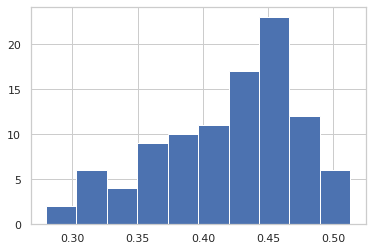

In [ ]:
print(mean_r2_scores)
print(mean_rmse_scores)
plt.hist(mean_r2_scores)
plt.show()

(array([ 1.,  2.,  7., 12., 14., 23., 21., 13.,  5.,  2.]),
 array([291.60531111, 295.90045577, 300.19560043, 304.49074509,
        308.78588975, 313.0810344 , 317.37617906, 321.67132372,
        325.96646838, 330.26161304, 334.5567577 ]),
 <a list of 10 Patch objects>)

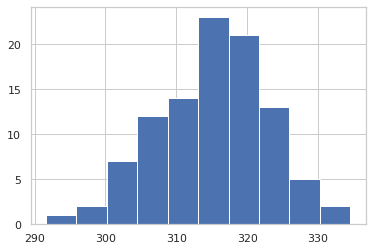

In [ ]:
plt.hist(mean_rmse_scores)

In [ ]:
std = df['Compressive Strength (PSI) (7 days)  '].std()

normalized_mean_rmse_scores = [x/std for x in mean_rmse_scores]

(array([ 1.,  2.,  7., 12., 14., 23., 21., 13.,  5.,  2.]),
 array([0.6319667 , 0.64127514, 0.65058357, 0.659892  , 0.66920044,
        0.67850887, 0.6878173 , 0.69712573, 0.70643417, 0.7157426 ,
        0.72505103]),
 <a list of 10 Patch objects>)

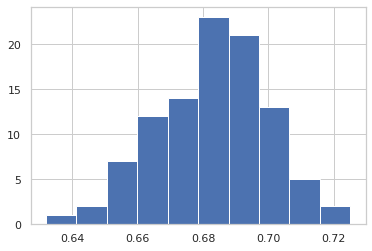

In [ ]:
plt.hist(normalized_mean_rmse_scores)

In [ ]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.1, random_state = 20)

In [ ]:
#model = LinearRegression(normalize=True)
model = RandomForestRegressor(n_estimators=110)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.predict(x_test)

array([4785.07272727, 3847.59090909, 3910.04545455, 4454.92727273,
       4412.6       , 4129.47272727, 4618.76363636, 3903.21818182,
       4029.42727273, 4438.97272727, 4042.9       ])

In [ ]:
print(y_test)

69     5165
1      3734
46     3839
5      3553
48     4518
31     3776
54     4546
2      3764
56     4234
79     4954
106    4304
Name: Compressive Strength (PSI) (7 days)  , dtype: int64


In [ ]:
model.score(x_test, y_test)

0.47239183126463424

In [ ]:
len(x_test)

11

In [ ]:
#model = LinearRegression(normalize=True)
model = RandomForestRegressor(n_estimators=110)

model.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.predict(x)

array([4231.43636364, 3795.57272727, 3866.8       , 4284.73636364,
       4785.71818182, 3891.76363636, 3952.3       , 4632.50909091,
       4903.37272727, 4589.85454545, 4440.30909091, 4436.36363636,
       4491.45454545, 4683.93636364, 4904.40909091, 4123.16363636,
       4051.56363636, 3666.24545455, 3882.24545455, 4119.78181818,
       4037.68181818, 3905.69090909, 4676.53636364, 4716.35454545,
       4231.75454545, 4886.46363636, 4522.73636364, 4444.42727273,
       3942.68181818, 4857.59090909, 4112.38181818, 3883.70909091,
       3932.30909091, 4017.69090909, 4051.91818182, 3764.89090909,
       4004.47272727, 4237.32727273, 4333.50909091, 4470.05454545,
       4893.69090909, 4496.70909091, 3637.43636364, 4167.69090909,
       4161.69090909, 4099.53636364, 3867.81818182, 4487.04545455,
       4535.5       , 4739.84545455, 4130.61818182, 3871.47272727,
       4044.90909091, 4663.22727273, 4583.88181818, 3842.59090909,
       4110.23636364, 4225.54545455, 3868.78181818, 5299.37272

In [ ]:
model.score(x,y)

0.9315850799668299

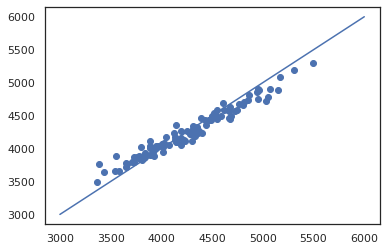

In [ ]:
sns.set_style('white')
#a = [0.00000825,0.00001125]
a = [3000, 6000]
plt.plot(a, a)
plt.scatter(y, model.predict(x))

0.26389338988390165
0.6633371533833602
0.2856965960388257
0.14637082766105547
0.538811889065681
0.6429275833133659
0.5507199926001396
0.39539270769124524
0.5511083459016015
-0.45102655780318557


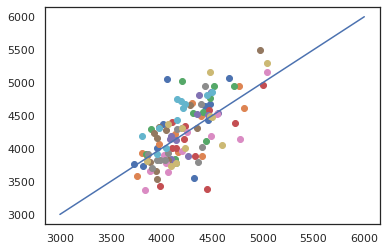

In [ ]:
a = [3000, 6000]
plt.plot(a, a)

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

x = np.array(x)
for i,j in kf.split(x):
  x_train = x[i]
  y_train = y[i]
  x_test = x[j]
  y_test = y[j]

  #model = LinearRegression(normalize=True)
  model = RandomForestRegressor()
  model.fit(x_train, y_train)
  print(model.score(x_test, y_test))
  plt.scatter( model.predict(x_test), y_test)